# __SpringBoard Capstone Project 2: Human Activity Recognition__
## __Exploratory Data Analysis__

__Written by: Sofy Weisenberg__<br>
__Date: 03/26/20__

__Importing the Data__<br>
Load the data from file and create a pandas dataframe. The raw data has been pre-processed and the feature engineering has already been performed to create a processed dataset. See the project report for more details on those steps. 

In [62]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
import time

# Use the current working directory path to navigate to the location of the processed data
cwd_path = os.getcwd()
data_path = os.path.join(cwd_path, '..', 'data', 'processed')

# Throw an assert error if the path does not exist
assert os.path.exists(data_path)

In [83]:
# Create a full dataframe by joining the already split train/test data
train_data_df = pd.read_csv(os.path.join(data_path,'train.csv'))
test_data_df = pd.read_csv(os.path.join(data_path,'test.csv'))
full_data_df = pd.concat([train_data_df, test_data_df], axis=0)

__Initial Exploration__<br>
Now that the data has been loaded, the dataframe can be examined to gain a clearer picture of the data structure and features.

In [84]:
full_data_df.info()

# Throw an assert error if there are any missing values in the dataset
assert (full_data_df.isnull().sum().sum() == 0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.3+ MB


In [64]:
# Display a few rows of the data
full_data_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


It can be seen that there are a total of 10299 rows and 563 columns, with no missing values. The feature data is all data type float64, and the last 2 columns are the subject number (int64) and the activity class (object).

In [65]:
full_data_df.groupby('Activity').count().subject

Activity
LAYING                1944
SITTING               1777
STANDING              1906
WALKING               1722
WALKING_DOWNSTAIRS    1406
WALKING_UPSTAIRS      1544
Name: subject, dtype: int64

The various activity classes are approximately evenly distributed since each subject performed each of the six activities. This means that for classification modeling, this is a balanced (rather than an imbalanced) dataset.

Next, it would be helpful to see a summary of the descriptive statistics for the data. This is done using the .describe() method.

In [85]:
full_data_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [86]:
# Check all columns for range [-1, 1]
columns = list(full_data_df.drop(['subject', 'Activity'], axis=1))

max_false_count = 0
min_false_count = 0
# Loop over feature columns
for column in columns:
    if max(full_data_df[column]) != 1:
        max_false_count += 1
        print('Max value is not 1 for column: ' + column)
    if min(full_data_df[column]) != -1:
        min_false_count += 1
        print('Min value is not -1 for column: ' + column)
        
# Throw an assert error if there are columns for which the range is not[-1, 1]
assert (max_false_count == 0)        
assert (min_false_count == 0)  

From the results of the .describe() method and the two assert statements above, it appears that the data has already been scaled to a range of [-1, 1] for all feature columns which will be helpful for both data visualization and machine learning. Additional scaling, for example standardization in which the mean is zero and standard deviation is 1, may be additionally performed during the modeling phase of the project.

__Plotting Example Sensor Data__<br>
To get a feeling for the type of data, it would be helpful to plot a few examples of the various activities across several subjects. Total mean acceleration in the x,y,z directions is a good starting point. 

In [155]:
# Create a function to plot x, y, z total acceleration for a given subject and activity

def plot_acceleration(ax, subject, activity):
    # filter dataframe by (subject, activity)
    df_by_sub_act = full_data_df[(full_data_df.subject == subject) & (full_data_df.Activity == activity)]
    
    # create x-axis array of 2.5 second intervals with (subject, activity) specific number of data points
    x_values = np.arange(0, len(df_by_sub_act.index)*2.5 ,2.5)
    
    # get the mean accelaration data
    x_acc = df_by_sub_act['tBodyAcc-mean()-X']
    y_acc = df_by_sub_act['tBodyAcc-mean()-Y']   
    z_acc = df_by_sub_act['tBodyAcc-mean()-Z']
    
    # plot all three lines on one plot and add legend, axis labels, and title
    ax.plot(x_values, x_acc, label = 'X')
    ax.plot(x_values, y_acc, label = 'Y')
    ax.plot(x_values, z_acc, label = 'Z')
    ax.legend(loc = 'upper right')
    ax.set_title(f'Subject {subject}, Activity: {activity}')


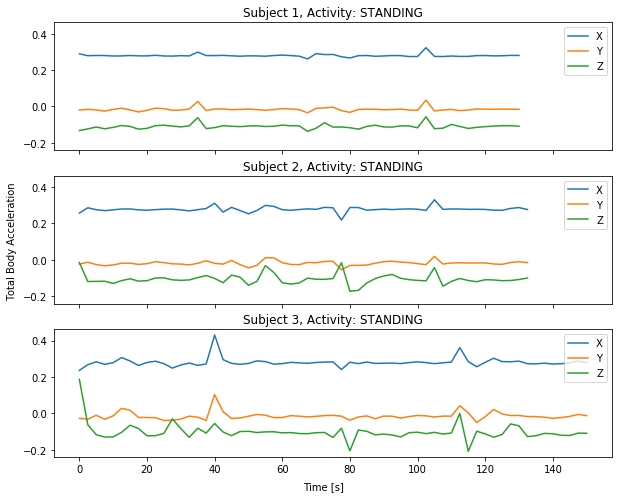

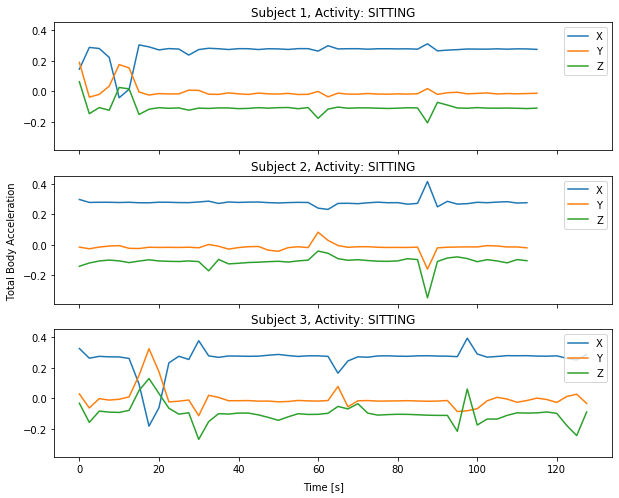

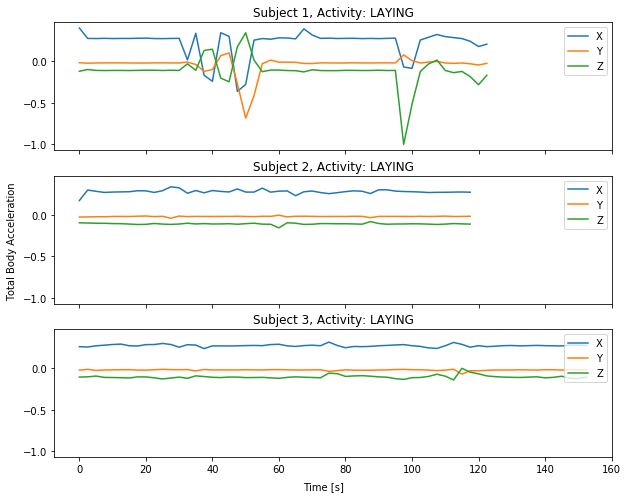

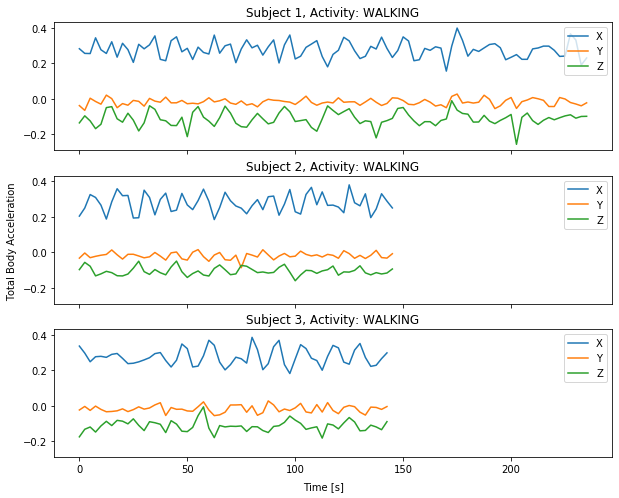

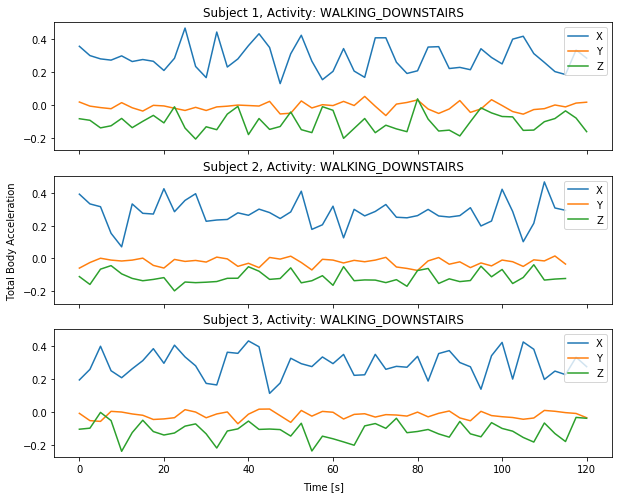

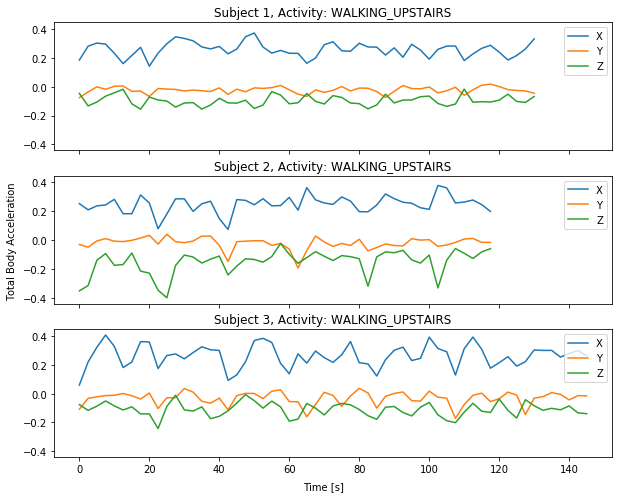

In [156]:
# Create subplots for the first n subjects for each of the 6 activities

n_subjects = 3
subjects = np.arange(1, n_subjects+1)
activities = list(full_data_df.Activity.drop_duplicates())

# nested for loops: first creates subplot set for given activity; second calls above plot function for each subject
for activity in activities:
    fig, axs = plt.subplots(nrows=n_subjects, sharex=True, sharey=True,figsize=(10, 8))
    fig.text(0.5, 0.07, 'Time [s]', ha='center')
    fig.text(0.06, 0.5, 'Total Body Acceleration', va='center', rotation='vertical')
    for idx, ax in enumerate(axs):
        plot_acceleration(ax, subjects[idx], activity)
        
plt.show()


Some observations from the plots above:
- Each subject recorded the same activity for a different period of time.
- The laying activity, as expected, has the lowest signals (mostly flat). Except subject 1 who had an erratic (unusual) signal.
- Standing and sitting have signals of similar magnitude, which might be a source of classification error.
- Walking upstairs seems to produce more regular cycles of movement than walking downstairs.

__Visualizing Separability of Classes__<br>
From the single attribute type plotted above (total body acceleration), some differences between the classes are immediately noticeable. However, it does not give a clear picture of the overall dataset and how the rest of the attributes contribute to the separability of the activity classes.

Two visualization techniques, using different dimensionality reduction methods, will be implemented and compared to get a qualitative indication of the class separability using the full dataset. The techniques are as follows (summarized from this resource: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b):
- Principle component analysis (PCA) uses the eigenvectors of the covariance matrix to reduce the dimensionality of the data. The eigenvectors point in the directions of maximum variation in a dataset, preserving as much of the variability in the data in as few dimensions as possible. Two or three of the principle components may be plotted for visualization purposes.
- t-Distributed Stochastic Neighbor Embedding (t-SNE) is a probablistic technique for dimensionality reduction, which minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.<br>

t-SNE is computationally heavy for very high dimensional data and will likely require an initial dimensionality reduction before execution, for example PCA to the first 50 principle components.

In [251]:
# separate only the feature data
pca_matrix = full_data_df.drop(['subject', 'Activity'], axis=1)

# performing PCA for visualization
time_start = time.time()
pca = PCA(n_components=3)
pca_result = pca.fit_transform(pca_matrix.values)

# add 3 new columns to feature matrix with the 1st, 2nd, 3rd principle components
pca_matrix['pca-1'] = pca_result[:,0]
pca_matrix['pca-2'] = pca_result[:,1] 
pca_matrix['pca-3'] = pca_result[:,2]
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 0.1545860767364502 seconds
Explained variation per principal component: [0.62227069 0.04772595 0.04018191]


The PCA analysis was quite fast, requiring relatively low computational resources to execute. The first 3 principle components represent nearly 71% of the overall variation in the dataset. This is quite high and should hopefully allow for producing some useful visualizations.

Text(0.5, 1.0, '2D PCA Visualization of Activity Classes')

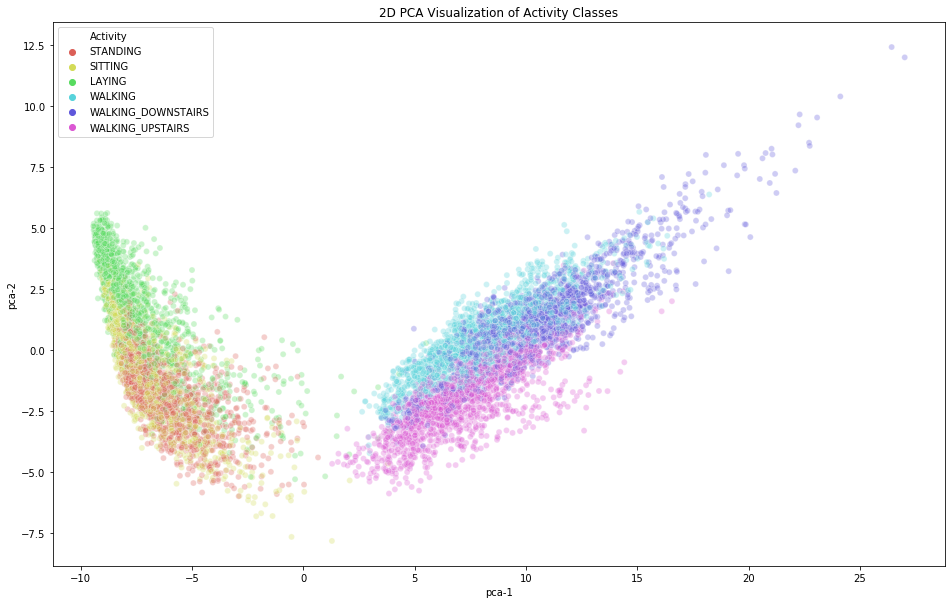

In [233]:
# add back the Activity column to use as basis for point colors in Seaborn plots
pca_matrix['Activity'] = full_data_df['Activity']

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="Activity",
    palette=sns.color_palette("hls", 6),
    data=pca_matrix,
    legend="full",
    alpha=0.3
)

plt.title('2D PCA Visualization of Activity Classes')

Text(0.5, 1.0, '2D PCA Visualization of Activity Classes (Rotated)')

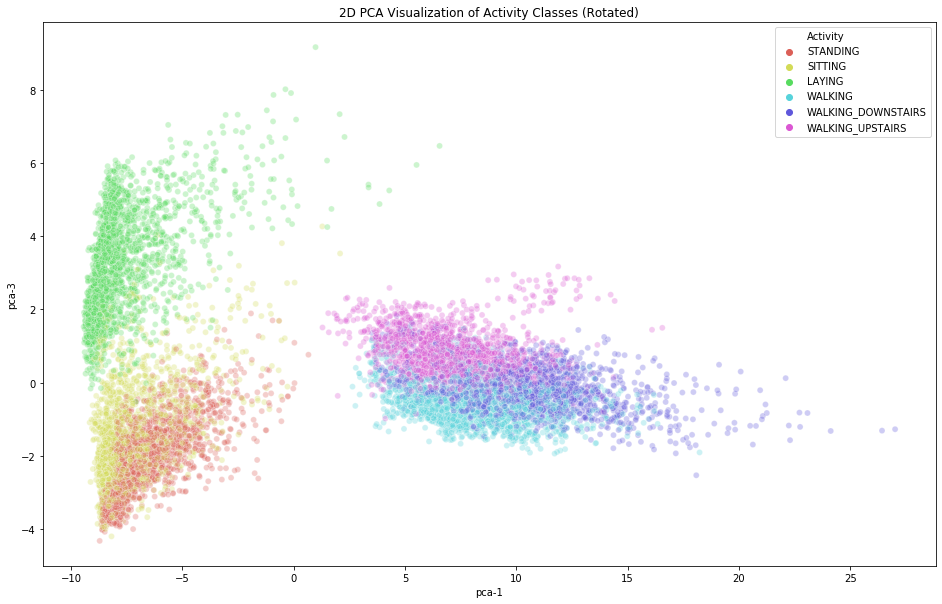

In [234]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-1", y="pca-3",
    hue="Activity",
    palette=sns.color_palette("hls", 6),
    data=pca_matrix,
    legend="full",
    alpha=0.3
)
plt.title('2D PCA Visualization of Activity Classes (Rotated)')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

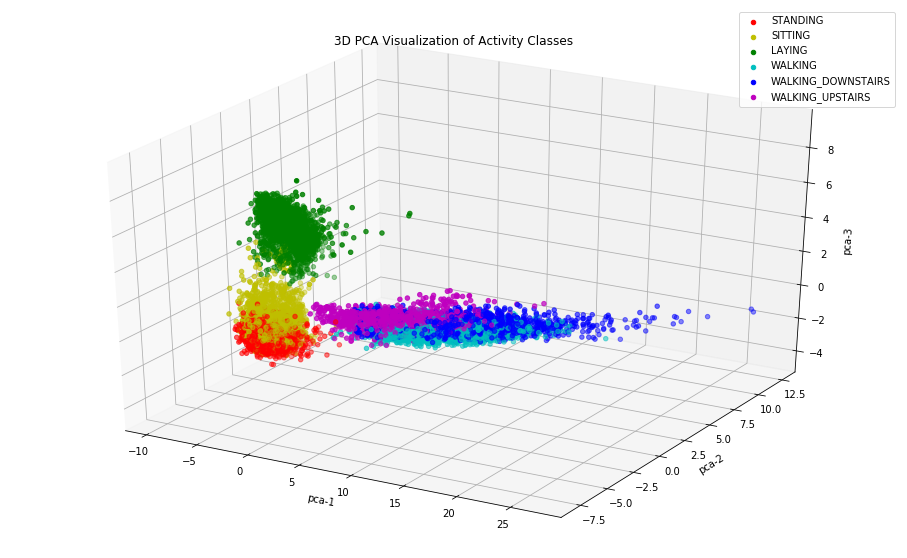

In [235]:
from matplotlib.colors import ListedColormap

#creating a custom mapping to match the 2D plots from before
cmap = ListedColormap(['r', 'y', 'g', 'c', 'b', 'm'])

# add an Activity column transformed to float to use as basis for point colors in matplotlib scatter plot
activity_dict = {"STANDING": 1.0, "SITTING": 2.0, "LAYING":3.0, "WALKING":4.0, "WALKING_DOWNSTAIRS":5.0, "WALKING_UPSTAIRS":6.0}
pca_matrix['Activity_num'] = full_data_df['Activity']
pca_matrix['Activity_num'].replace(activity_dict, inplace=True)

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs = pca_matrix["pca-1"], 
    ys = pca_matrix["pca-2"], 
    zs = pca_matrix["pca-3"], 
    c = pca_matrix["Activity_num"], 
    cmap = cmap
)
ax.set_xlabel('pca-1')
ax.set_ylabel('pca-2')
ax.set_zlabel('pca-3')
ax.set_title('3D PCA Visualization of Activity Classes')

# need to create an additional empty scatter plot to correctly display the plt legend
[ax.scatter([], [], c=cmap(i), label=list(activities)[i]) for i in range(len(activities))]
ax.legend()

plt.show()


In [245]:
# separate only the feature data
tsne_matrix = full_data_df.drop(['subject', 'Activity'], axis=1)

# performing tSNE for visualization
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(tsne_matrix)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10299 samples in 1.140s...
[t-SNE] Computed neighbors for 10299 samples in 63.218s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.351237
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.874519
[t-SNE] K

Text(0.5, 1.0, '2D t-SNE Visualization of Activity Classes')

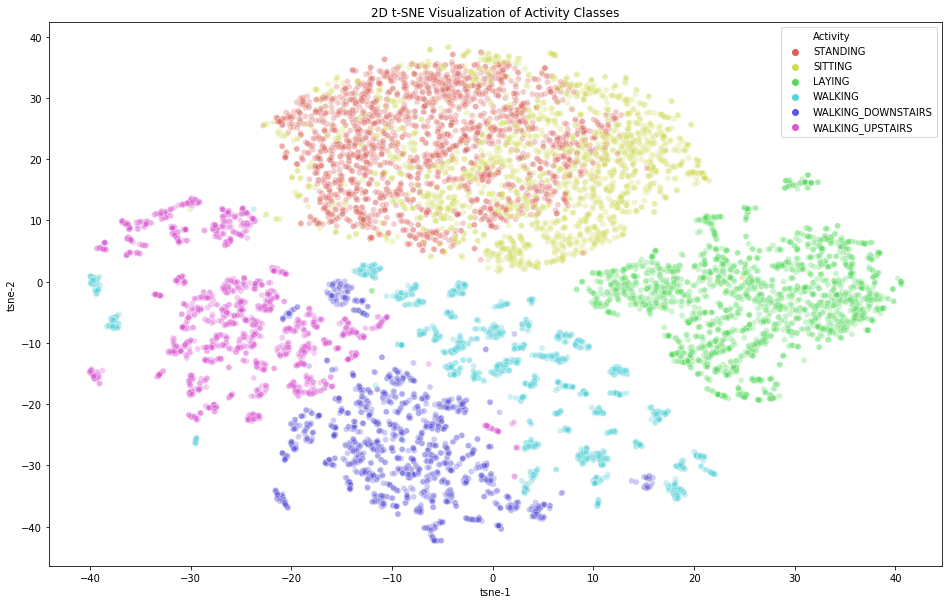

In [246]:
# add back the Activity column to use as basis for point colors in Seaborn plots
tsne_matrix['Activity'] = full_data_df['Activity']

tsne_matrix['tsne-1'] = tsne_results[:,0]
tsne_matrix['tsne-2'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-1", y="tsne-2",
    hue="Activity",
    palette=sns.color_palette("hls", 6),
    data=tsne_matrix,
    legend="full",
    alpha=0.3
)
plt.title('2D t-SNE Visualization of Activity Classes')

As can be seen above, the t-SNE approach to class separability visualization took nearly 600x the runtime of PCA. Several combinations of perplexity and n_iterations were tried with no significant difference in the overall visualization appearance or KL divergence. The algorithm appears to have converged and produced some plausible clusterings, which offer a bit more visual separation than PCA, though standing and sitting still appear heavily intermixed. However, the drawback of t-SNE is in its interpretability: since Euclidean distance between points and between clusters is not necessarily indicative of relative correlation strengths. Overall, it seems PCA could be a sufficient technique for visualization in this case.

Additionally, it is possible to combine the two techniques and examine the result. This is done below.

In [256]:
# performing PCA for dimensionality reduction
time_start = time.time()
pca = PCA(n_components=50)
pca_result = pca.fit_transform(pca_matrix.values)
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.2702493667602539 seconds
Cumulative explained variation for 50 principal components: 0.9283453318270306


In [259]:
# performing t-SNE on the 50-component PCA results
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_pca_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.091s...
[t-SNE] Computed neighbors for 10299 samples in 3.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.182920
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.734207
[t-SNE] KL

Text(0.5, 1.0, '2D t-SNE Visualization of Activity Classes')

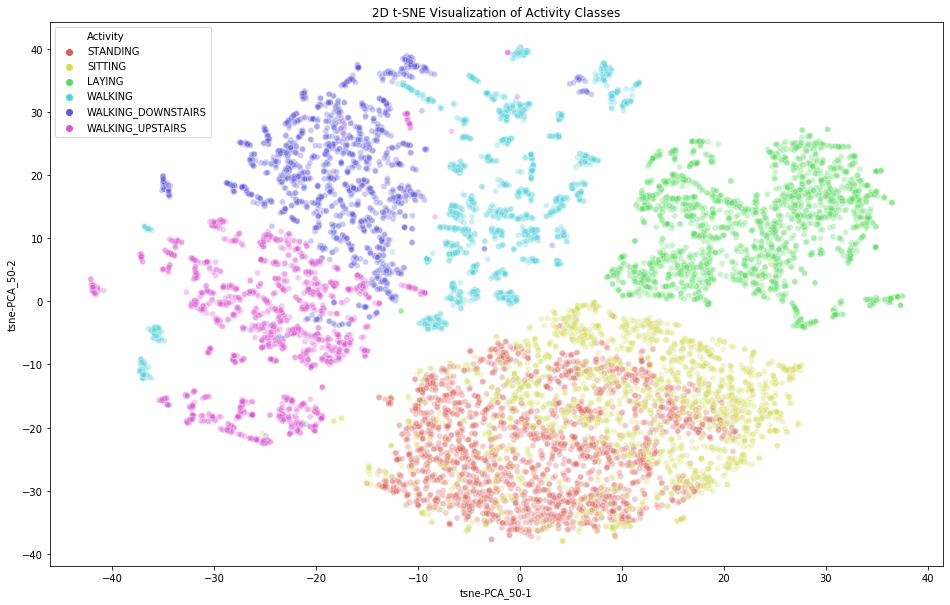

In [261]:
tsne_matrix['tsne-PCA_50-1'] = tsne_pca_results[:,0]
tsne_matrix['tsne-PCA_50-2'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-PCA_50-1", y="tsne-PCA_50-2",
    hue="Activity",
    palette=sns.color_palette("hls", 6),
    data=tsne_matrix,
    legend="full",
    alpha=0.3
)
plt.title('2D t-SNE Visualization of Activity Classes')

When combining the two techniques, the runtime of t-SNE is reduced by about 68%. The visualizations are very comparable, with some expected rotation. There does not appear to be significant loss of relational/probablistic robustness. 

This would indicate that there is a computational advantage to running PCA first and then t-SNE. However, with PCA offering better interpretability than t-SNE, as well as being faster and deterministic, it seems to be the best option for this analysis.